# Final Term Project - Fraud Detection for Small E-Commerce Platforms 

## Milestone 1

6.2 Term Project: Term Project Milestone 1: Data Selection and EDA

Do a graphical analysis creating a minimum of four graphs. Label your graphs appropriately and explain/analyze the information provided by each graph. Your analysis should begin to answer the question(s) you are addressing. Write a short overview/conclusion of the insights gained from your graphical analysis.

In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pip install -qq --upgrade scikit-learn imbalanced-learn yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [6]:
df = pd.read_csv("credit_card_fraud_dataset.csv")
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


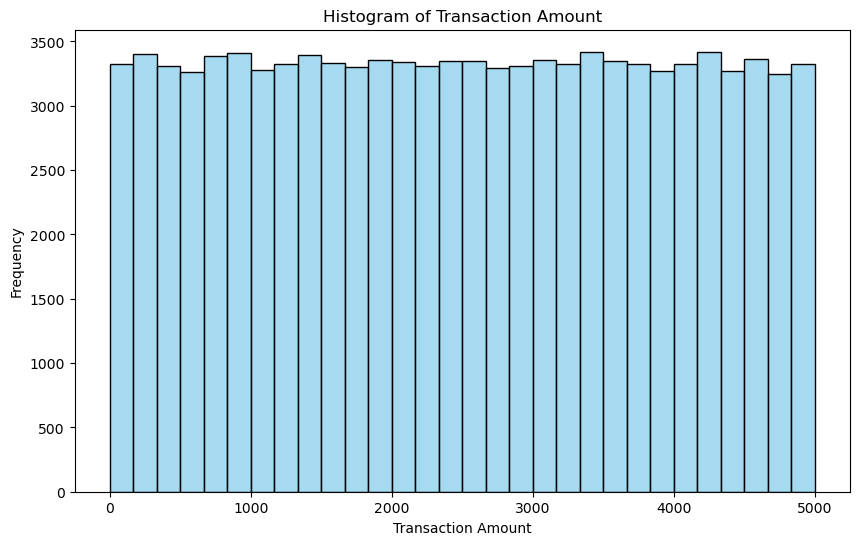

In [7]:
# 1. Histogram of Amount (distribution of transaction amounts)
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], color='skyblue', bins=30)
plt.title('Histogram of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of transaction amounts in the dataset. Relatively equal height of the bars across the range suggests uniform distribution with no significant skewness. It does not indicate any specific ranges of transaction amounts that are disproportionately associated with fraud.

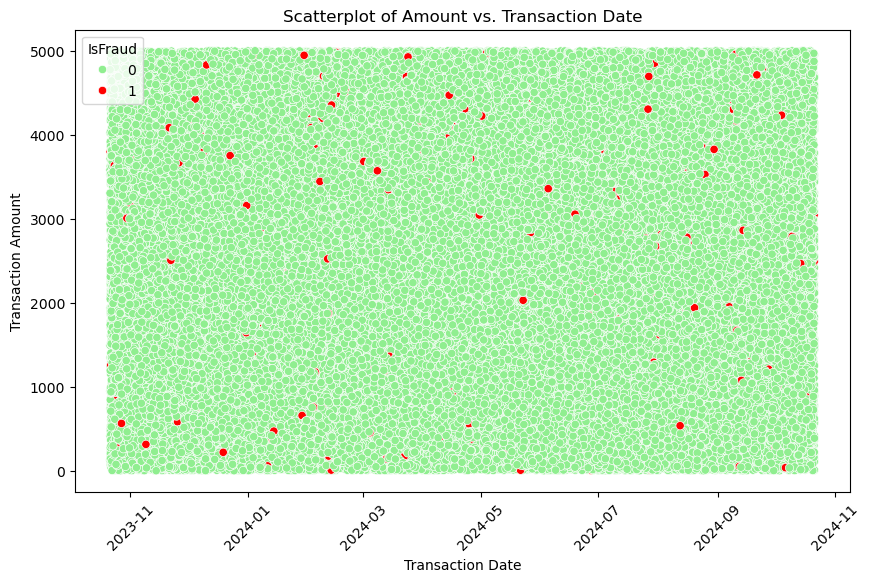

In [9]:
# 2. Scatterplot of Amount vs. Transaction Date (check for any temporal trends)
# Convert 'Transaction Date' to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['TransactionDate'], y=df['Amount'], 
                hue=df['IsFraud'], 
                palette={0: 'lightgreen', 1: 'red'},  
                legend='full')
plt.title('Scatterplot of Amount vs. Transaction Date')
plt.xlabel('Transaction Date')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.show()

The scatterplot shows the relationship between the transaction date and the transaction amount. Fraudulent transactions (Red points) are sparsely and randomly distributed, with no apparent clustering at specific dates. They also span a wide range of amounts, indicating that fraud is not limited to transactions of a particular amount and can occur at any value.

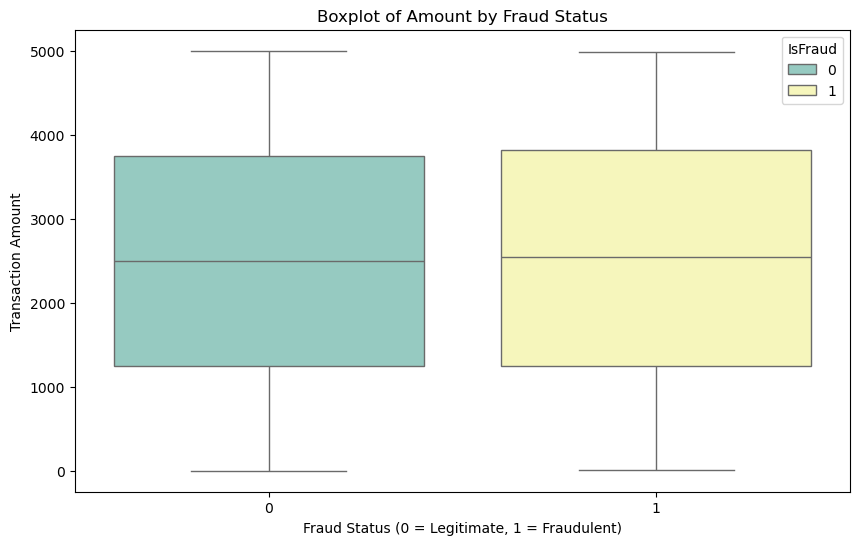

In [11]:
# 3. Boxplot of Amount by Fraud Status (compare amounts between legitimate and fraudulent transactions)
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsFraud', y='Amount', data=df, hue='IsFraud', palette='Set3')

plt.title('Boxplot of Amount by Fraud Status')
plt.xlabel('Fraud Status (0 = Legitimate, 1 = Fraudulent)')
plt.ylabel('Transaction Amount')
plt.show()

The boxplot compares the distribution of transaction amounts between legitimate and fraudulent transactions. The maximum and minimum amounts are nearly identical for both categories, suggesting no extreme outliers. The median of fraudulent transactions appears slightly higher indicating marginally higher amounts on average. The IQR is wider for legitimate transactions meaning legitimate transactions have a broader distribution of amounts and fraudulent transactions exhibit a more concentrated range of amounts. The slight differences in medians and IQRs could be informative for identifying patterns in fraud detection.

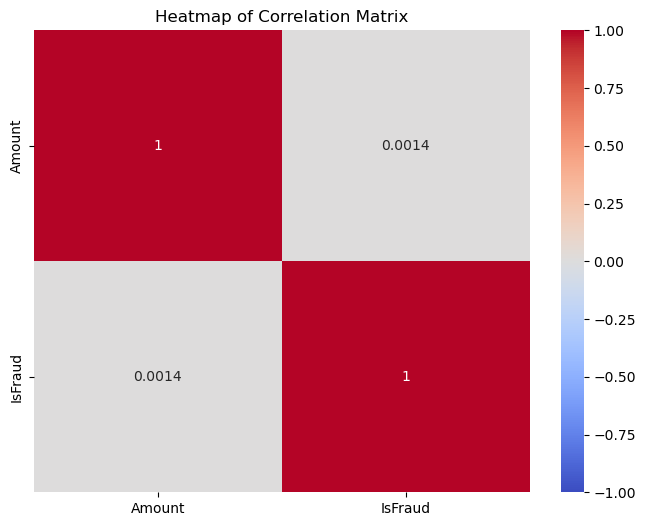

In [13]:
# 4. Heatmap of Correlation Matrix (check correlations between numerical columns)
# First, we only consider numerical columns for the correlation matrix
corr_matrix = df[['Amount', 'IsFraud']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()

The correlation between Transaction Amount and Is Fraud is approximately 0.0014, indicating a very weak positive relationship. Since the correlation is almost negligible, the amount alone is not strongly predictive of fraudulent transactions. Additional features and interactions between variables will likely be more informative for identifying fraud.

Overview/Conclusion from Graphical analysis: 

Transaction date and amount, analyzed independently, do not significantly differentiate fraudulent from legitimate transactions. We will need to incorporate other variables and engineered features. Fraud detection may require techniques like resampling or other specialized algorithms to address the imbalance between fraud and legitimate cases. 

## Milestone 2

In [17]:
df.columns

Index(['TransactionID', 'TransactionDate', 'Amount', 'MerchantID',
       'TransactionType', 'Location', 'IsFraud'],
      dtype='object')

### Step 1: Drop any features that are not useful for your model building and explain why they are not useful.

I am Removing "TransactionID" column as it is unique for each transaction and has no relevance for fraud detection.

In [19]:
# Drop non-predictive columns
df.drop(columns=['TransactionID'], inplace=True)

### Step 2: Perform any data extraction/selection steps.

I am extracting useful time-related features from "TransactionDate" like day of week, hour of day and month. This can be used to add new features. 

Day of Week: Some fraud activities may occur on specific days.

Hour of Day: Useful for understanding fraud patterns based on time.

Month: Seasonal trends may exist.

In [21]:
# Extract TransactionDate
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['year'] = df['TransactionDate'].dt.year
df['month'] = df['TransactionDate'].dt.month
df['day_of_week'] = df['TransactionDate'].dt.dayofweek  # Monday=0, Sunday=6
df['hour'] = df['TransactionDate'].dt.hour

### Step 3:  Transform features if necessary

I am marking Large Transactions as Suspicious.
Flagging large transactions as suspicious helps detect potential fraud because fraudsters often 
make high-value purchases before a stolen card/account is blocked

In [24]:
df['IsLargeTransaction'] = (df['Amount'] > df['Amount'].quantile(0.95)).astype(int)

I am logging transformation for Skewed Data. Log transformation helps handle right-skewed distribution by making the data more normally distributed, improving fraud detection

In [26]:
import numpy as np
df['LogAmount'] = np.log1p(df['Amount'])

I am sttandardizing "Amount column" to ensure that Amount doesn’t dominate other features, making it easier for models to identify outliers or extreme values, which are often indicative of fraud.

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Amount_standardized'] = scaler.fit_transform(df[['Amount']])
df

,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud,year,month,day_of_week,hour,IsLargeTransaction,LogAmount,Amount_standardized
0,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0,2024,4,2,14,0,8.340520,1.173161
1,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0,2024,3,1,13,0,7.886348,0.112740
2,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0,2024,1,0,10,0,6.665684,-1.187661
3,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0,2024,4,5,23,0,8.164909,0.705284
4,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0,2024,7,4,18,0,5.913692,-1.475326
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0,2024,6,4,0,0,6.964410,-0.998193
99996,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0,2023,10,6,23,0,5.697932,-1.525117
99997,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0,2024,5,4,19,0,8.146002,0.659638
99998,2024-10-18 09:43:36.027601,3750.79,644,purchase,Philadelphia,0,2024,10,4,9,0,8.229988,0.869169


### Step 4: Engineer New Features

Transaction Amount Binning: Creating bins for Amount (e.g., low, medium, high). Fraud may correlate with specific ranges of transaction amounts.

Transaction Frequency by Merchant: Aggregating data to calculate the number of transactions per MerchantID to create a new feature "merchant_transaction_count". Higher frequency could indicate suspicious activity.

The 'DeviationFromMerchantAvg' feature measures how much a transaction amount deviates from the average transaction amount at a given MerchantID. This can highlight suspicious transactions

In [30]:
# Engineer new features
df['amount_bin'] = pd.cut(df['Amount'], bins=[0, 100, 500, 1000, 5000], labels=['low', 'medium', 'high', 'very_high'])
merchant_counts = df['MerchantID'].value_counts().to_dict()
df['merchant_transaction_count'] = df['MerchantID'].map(merchant_counts)
df['MerchantAvgAmount'] = df.groupby('MerchantID')['Amount'].transform('mean')
df['DeviationFromMerchantAvg'] = df['Amount'] - df['MerchantAvgAmount']
df

,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud,year,month,day_of_week,hour,IsLargeTransaction,LogAmount,Amount_standardized,amount_bin,merchant_transaction_count,MerchantAvgAmount,DeviationFromMerchantAvg
0,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0,2024,4,2,14,0,8.340520,1.173161,very_high,110,2557.566909,1631.703091
1,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0,2024,3,1,13,0,7.886348,0.112740,very_high,115,2640.400174,19.309826
2,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0,2024,1,0,10,0,6.665684,-1.187661,high,85,2417.777882,-1633.777882
3,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0,2024,4,5,23,0,8.164909,0.705284,very_high,89,2226.250449,1288.149551
4,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0,2024,7,4,18,0,5.913692,-1.475326,medium,94,2459.600638,-2090.530638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0,2024,6,4,0,0,6.964410,-0.998193,very_high,82,2603.156341,-1545.866341
99996,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0,2023,10,6,23,0,5.697932,-1.525117,medium,109,2568.867982,-2271.617982
99997,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0,2024,5,4,19,0,8.146002,0.659638,very_high,94,2493.685426,954.874574
99998,2024-10-18 09:43:36.027601,3750.79,644,purchase,Philadelphia,0,2024,10,4,9,0,8.229988,0.869169,very_high,104,2137.309135,1613.480865


### Step 5: Handle Missing data based on context

For Amount: Using median imputation to handle skewed data.

For MerchantID: If missing, treating as a separate category (e.g., "Unknown Merchant").

For categorical variables like TransactionType and Location: Replacing missing values with "Unknown".

In [32]:
# Handle missing values
df.fillna({'Amount': df['Amount'].median()}, inplace=True)
df.fillna({'MerchantID': 'Unknown'}, inplace=True)
df.fillna({'TransactionType': 'Unknown'}, inplace=True)
df.fillna({'Location': 'Unknown'}, inplace=True)

In [33]:
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0].index.tolist()

print("Columns with missing values:", missing_columns)

Columns with missing values: []


### Step 6: Create dummy variables if necessary.

I am encoding Categorical Variables and converting "TransactionType" and "Location" into dummy variables, encoding to transform these categorical features into numeric format.

In [35]:
print(df['TransactionType'].value_counts())

TransactionType
refund      50131
purchase    49869
Name: count, dtype: int64


In [36]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['TransactionType', 'Location', 'amount_bin'], drop_first=True)

In [37]:
df.columns

Index(['TransactionDate', 'Amount', 'MerchantID', 'IsFraud', 'year', 'month',
       'day_of_week', 'hour', 'IsLargeTransaction', 'LogAmount',
       'Amount_standardized', 'merchant_transaction_count',
       'MerchantAvgAmount', 'DeviationFromMerchantAvg',
       'TransactionType_refund', 'Location_Dallas', 'Location_Houston',
       'Location_Los Angeles', 'Location_New York', 'Location_Philadelphia',
       'Location_Phoenix', 'Location_San Antonio', 'Location_San Diego',
       'Location_San Jose', 'amount_bin_medium', 'amount_bin_high',
       'amount_bin_very_high'],
      dtype='object')

In [38]:
# Final dataset
print(df.head())

             TransactionDate   Amount  MerchantID  IsFraud  year  month  \
0 2024-04-03 14:15:35.462794  4189.27         688        0  2024      4   
1 2024-03-19 13:20:35.462824  2659.71         109        0  2024      3   
2 2024-01-08 10:08:35.462834   784.00         394        0  2024      1   
3 2024-04-13 23:50:35.462850  3514.40         944        0  2024      4   
4 2024-07-12 18:51:35.462858   369.07         475        0  2024      7   

   day_of_week  hour  IsLargeTransaction  LogAmount  ...  \
0            2    14                   0   8.340520  ...   
1            1    13                   0   7.886348  ...   
2            0    10                   0   6.665684  ...   
3            5    23                   0   8.164909  ...   
4            4    18                   0   5.913692  ...   

   Location_Los Angeles  Location_New York  Location_Philadelphia  \
0                 False              False                  False   
1                 False              False        

## Milestone 3

#### Step 1: Selecting the model - Random Forest

Explain/justify why you are selecting the model(s) and evaluation metric(s) you choose?

Based on our dataset with columns like Amount, TransactionType, Location, etc. I think Random Forest model will work best. Random Forest is a powerful model for this type of data, as it handles both numerical and categorical variables, manages non-linear patterns well, and is robust to overfitting. Then, I can evaluate the model performance using cross-validation and metrics like precision, recall, f1 score, Accuracy, Confusion matrix and AUC-ROC Score (Area Under the Receiver Operating Characteristic Curve).

#### Step 2: Building the model

In [44]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import warnings
warnings.simplefilter("ignore", category=UserWarning)

In [45]:
# Define target and features
X = df.drop(['TransactionDate', 'MerchantID', 'IsFraud'], axis=1)  # Drop non-predictive columns
y = df['IsFraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [46]:
# Handle class imbalance using class weights
classes = np.array([0, 1])  # Convert to numpy array
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}


# Initialize Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,            # Number of trees
    random_state=42,             # For reproducibility
    class_weight=class_weights_dict,  # Handle imbalance
    max_depth=None,              # Default, no max depth
    min_samples_split=2,         # Default minimum samples to split
    min_samples_leaf=1           # Default minimum samples per leaf
)

In [47]:
# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

#### Step 3: Evaluate the model

In [49]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy:.2f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_score = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUC-ROC Score: {roc_score:.4f}")

Accuracy of the Random Forest model: 0.99
Confusion Matrix:
[[19800     0]
 [  200     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19800
           1       0.00      0.00      0.00       200

    accuracy                           0.99     20000
   macro avg       0.49      0.50      0.50     20000
weighted avg       0.98      0.99      0.99     20000


AUC-ROC Score: 0.5068


The evaluation results indicate that Random Forest model achieves an accuracy of 99%, which seems high at first glance. However, examining the confusion matrix and classification report reveals a critical issue:

The model correctly classifies all non-fraudulent transactions (19800 cases of IsFraud = 0) but completely fails to identify fraudulent transactions (IsFraud = 1).

Recall for fraud cases (1) is 0.00, meaning the model does not detect any fraud cases.

Precision is also 0.00, meaning no fraudulent transaction was predicted correctly.

AUC-ROC Score of 0.5068 indicates the model performs just slightly better than random guessing for fraud detection.

#### Step 4: Analyze Feature Importance: 

In [52]:
# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(importance_df)


Feature Importance:
                       Feature  Importance
9            MerchantAvgAmount    0.124613
10    DeviationFromMerchantAvg    0.112885
7          Amount_standardized    0.106105
0                       Amount    0.104294
6                    LogAmount    0.104169
8   merchant_transaction_count    0.102493
4                         hour    0.091904
2                        month    0.071656
3                  day_of_week    0.059269
11      TransactionType_refund    0.017202
1                         year    0.010762
13            Location_Houston    0.009760
18        Location_San Antonio    0.009722
14        Location_Los Angeles    0.009661
19          Location_San Diego    0.009435
12             Location_Dallas    0.009396
16       Location_Philadelphia    0.009302
20           Location_San Jose    0.009279
17            Location_Phoenix    0.009223
15           Location_New York    0.009138
22             amount_bin_high    0.002966
21           amount_bin_medium   

#### Step 5: Refine the feature set by retaining the most impactful features and removing those with minimal importance

The feature importance results provide valuable insights into which variables significantly contribute to the model's predictions. We will refine the feature set by retaining the most impactful features and removing those with minimal importance.

In [55]:
# Refine the dataset by selecting important features
refined_features = [
    'MerchantAvgAmount', 'DeviationFromMerchantAvg', 'merchant_transaction_count',
    'Amount', 'LogAmount', 'Amount_standardized', 
    'hour', 'month', 'day_of_week', 
    'TransactionType_refund'
]

X_refined = X[refined_features]
y = df['IsFraud']

In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_refined, y, test_size=0.2, random_state=42)

# Retrain the Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [57]:
# Evaluate the model
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

accuracy = rf_model.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(f"AUC-ROC Score: {auc_roc}")

Accuracy: 0.98935
Confusion Matrix:
[[19787     0]
 [  213     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19787
           1       0.00      0.00      0.00       213

    accuracy                           0.99     20000
   macro avg       0.49      0.50      0.50     20000
weighted avg       0.98      0.99      0.98     20000

AUC-ROC Score: 0.47389961303848427


Results after refining the features show that while the accuracy remains high (98.9%), the model is still struggling to identify the minority class, IsFraud = 1, as evident by Confusion Matrix, Precision, Recall, and F1-Score. Even AUC-ROC Score 0.4739 is below 0.5, showing that the model is performing worse than random guessing for distinguishing between classes.

#### Step 6: Re-sampling technique

Re-sampling techniques can help address class imbalance and improve model performance. We will try oversampling using SMOTE and undersampling the majority class.

1. Oversampling with SMOTE - SMOTE generates synthetic samples for the minority class by interpolating between existing samples.
2. Undersampling the Majority Class - This technique randomly reduces the number of samples in the majority class to match the minority class.

In [61]:
# Split data into training and testing sets
X = df.drop(columns=["IsFraud", "TransactionDate"])
y = df["IsFraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [62]:
# Define SMOTE and Random UnderSampler
smote = SMOTE(random_state=42)
undersampler = RandomUnderSampler(random_state=42)

In [63]:
# Combine both in a pipeline
resample_pipeline = Pipeline([
    ('smote', smote),
    ('undersample', undersampler)
])

In [64]:
# Apply resampling
X_resampled, y_resampled = resample_pipeline.fit_resample(X_train, y_train)

In [65]:
# Train the model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [66]:
# Evaluate on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("AUC-ROC Score:", auc_roc)

Confusion Matrix:
 [[19751    49]
 [  200     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     19800
           1       0.00      0.00      0.00       200

    accuracy                           0.99     20000
   macro avg       0.49      0.50      0.50     20000
weighted avg       0.98      0.99      0.98     20000

AUC-ROC Score: 0.4713667929292929


#### Step 7: Short overview/conclusion of the insights gained from the model building/evaluation

The results indicate that the model is still biased towards the majority class, IsFraud = 0. Most fraudulent transactions, IsFraud = 1 are either misclassified or ignored. Precision, recall, and F1-score for IsFraud = 1 are all 0.00, indicating the model is unable to identify any fraudulent transactions. The AUC-ROC score of 0.47 is close to random guessing 0.5.

This may be due to severe class imbalance in the dataset: Non-fraud cases (0): 19,800 and Fraud cases (1): 200. Looks like the model learns to always predict 0 to achieve a high accuracy, ignoring fraud detection altogether.

#### Conclusion

This project provided valuable insights into fraud detection challenges, but the current model is not effective for deployment. Future improvements should focus on handling class imbalance, exploring better algorithms, and enhancing feature engineering to build a fraud detection system that is both accurate and reliable. 